# Temperature - Variance Ablation

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import sys
import numpy as np
import glob
import torch

sys.path.insert(1,"/home/showalte/research/prob_seq_queries/")
from seq_queries.utils import read_pkl, write_pkl

### Temperature Plots: Temperature (x) v. Variance of I.S. Samples

In [56]:
paths = sorted(glob.glob("../data/importance_sampling/shakespeare/temp_ablation/*.pkl"))
temps = sorted([float(path.split("_")[-2].replace('t','').replace("z",'')) for path in sorted(paths)])

In [57]:
# (samples,vocab)
data_tensor = torch.stack([torch.gather(read_pkl(pth)['sample_est_std'],0,torch.LongTensor(read_pkl(pth)['excluded_terms']).unsqueeze(-1)).flatten() for pth in paths],dim = 0).numpy()#.reshape(len(temps),-1)
# data_tensor = torch.stack([read_pkl(pth)['sample_est_std'] for pth in paths],dim = 0).reshape(len(paths),-1).numpy()
data_tensor.shape

(19, 2287)

In [58]:
paths

['../data/importance_sampling/shakespeare/temp_ablation/val-dl_importance-sampling_17h_20s_0.0005t_exc-dynamic.pkl',
 '../data/importance_sampling/shakespeare/temp_ablation/val-dl_importance-sampling_17h_20s_0.001t_exc-dynamic.pkl',
 '../data/importance_sampling/shakespeare/temp_ablation/val-dl_importance-sampling_17h_20s_0.05t_exc-dynamic.pkl',
 '../data/importance_sampling/shakespeare/temp_ablation/val-dl_importance-sampling_17h_20s_0.1t_exc-dynamic.pkl',
 '../data/importance_sampling/shakespeare/temp_ablation/val-dl_importance-sampling_17h_20s_0.25t_exc-dynamic.pkl',
 '../data/importance_sampling/shakespeare/temp_ablation/val-dl_importance-sampling_17h_20s_0.5t_exc-dynamic.pkl',
 '../data/importance_sampling/shakespeare/temp_ablation/val-dl_importance-sampling_17h_20s_0.75t_exc-dynamic.pkl',
 '../data/importance_sampling/shakespeare/temp_ablation/val-dl_importance-sampling_17h_20s_001t_exc-dynamic.pkl',
 '../data/importance_sampling/shakespeare/temp_ablation/val-dl_importance-sampli

In [59]:
test_data = data_tensor
test_data.shape

(19, 2287)

In [74]:
df = pd.DataFrame(test_data.T)
df.columns = [temps]
# df.loc[:,1.0].head()
# reldf = df/(df[1.0] + 1e-5)
df = pd.melt(pd.DataFrame(test_data.T), value_vars = list(range(len(paths))))
df.shape

(43453, 2)

## Sequence Length: 10, 50 samples

In [71]:
df.value += 1e-5
df['value'] = np.log(df.value)
# df['value'] = np.log(df.value + 1e-2)
df.head()
df.shape

(43453, 2)

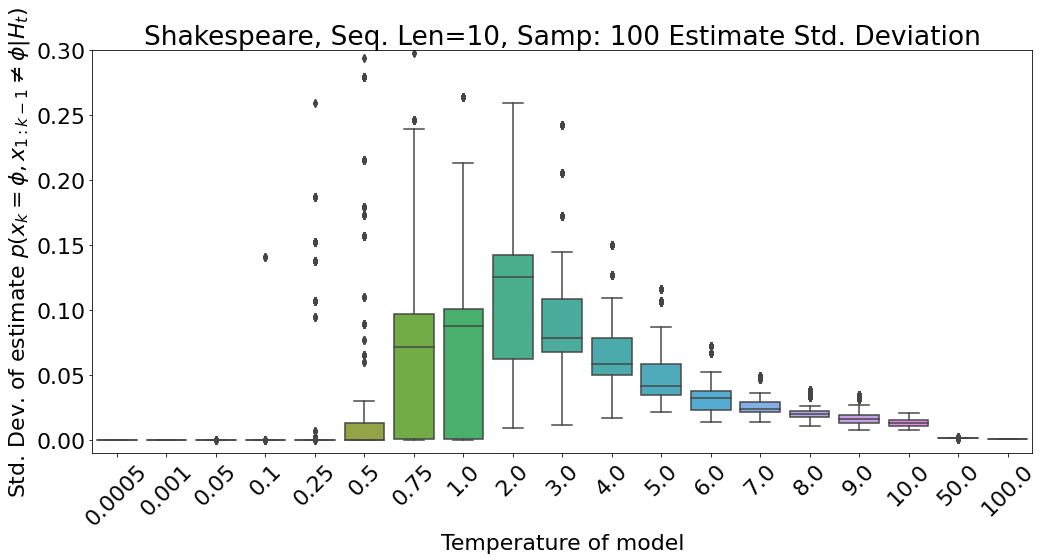

In [78]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=df.variable, y=df.value,whis = 1.5)
ax.set_xticklabels(temps)
plt.xlabel("Temperature of model")
plt.ylabel(r"Std. Dev. of estimate $p(x_k = \phi, x_{1:k-1} \neq \phi|H_t)$")
plt.title("Shakespeare, Seq. Len=10, Samp: 100 Estimate Std. Deviation")
plt.xticks(rotation=45)
plt.ylim(-0.01,0.3)
plt.tight_layout()

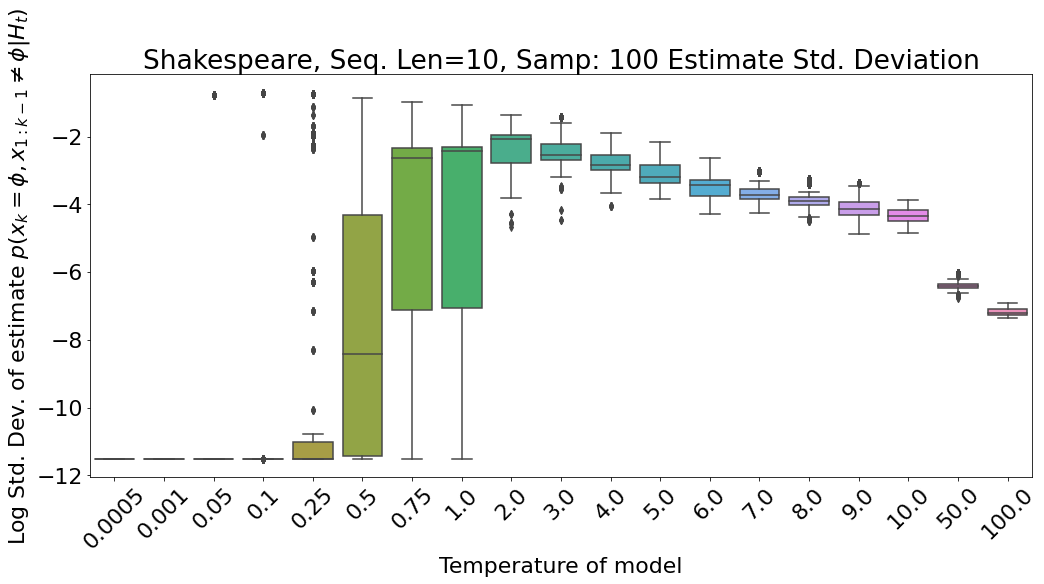

In [73]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=df.variable, y=df.value,whis = 1.5)
ax.set_xticklabels(temps)
plt.xlabel("Temperature of model")
plt.ylabel(r"Log Std. Dev. of estimate $p(x_k = \phi, x_{1:k-1} \neq \phi|H_t)$")
plt.title("Shakespeare, Seq. Len=10, Samp: 100 Estimate Std. Deviation")
plt.xticks(rotation=45)
plt.tight_layout()

## Sequence Length: 15, 100 samples

In [47]:
df.value += 1e-5
df['value'] = np.log(df.value)
# df['value'] = np.log(df.value + 1e-2)
df.head()
# df.shape

,variable,value
0,0,-11.512925
1,0,-11.512925
2,0,-11.512925
3,0,-11.512925
4,0,-11.512925


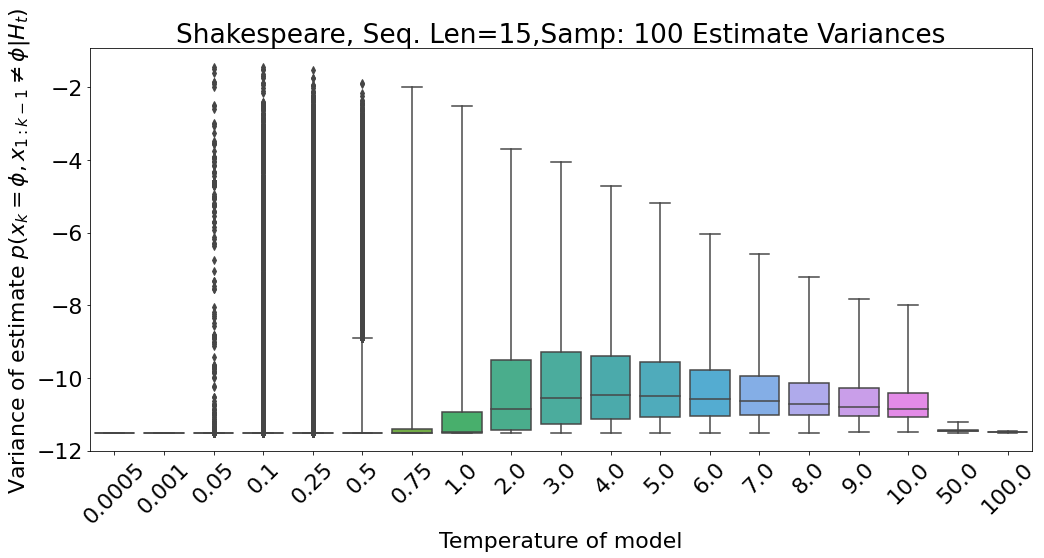

In [49]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=df.variable, y=df.value,whis = 10000.0)
ax.set_xticklabels(temps)
plt.xlabel("Temperature of model")
plt.ylabel(r"Variance of estimate $p(x_k = \phi, x_{1:k-1} \neq \phi|H_t)$")
plt.title("Shakespeare, Seq. Len=15,Samp: 100 Estimate Variances")
plt.xticks(rotation=45)
plt.tight_layout()

## Sequence Length: 5, 100 samples

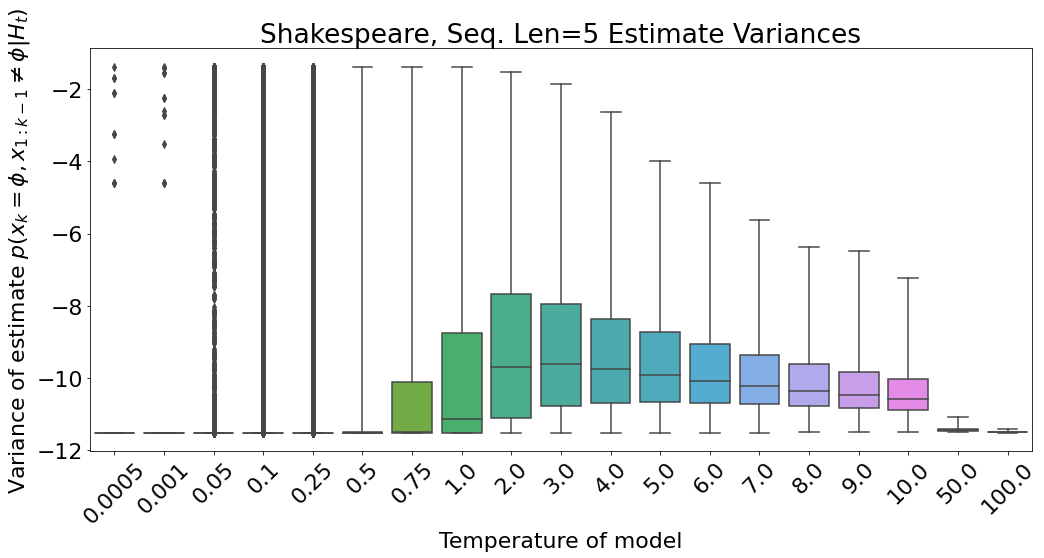

In [33]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=df.variable, y=df.value,whis = 10000.0)
ax.set_xticklabels(temps)
plt.xlabel("Temperature of model")
plt.ylabel(r"Variance of estimate $p(x_k = \phi, x_{1:k-1} \neq \phi|H_t)$")
plt.title("Shakespeare, Seq. Len=5, Samp: 100 Estimate Variances")
plt.xticks(rotation=45)
plt.tight_layout()

## Sequence Length: 10, 1000 samples

In [7]:
df.value += 1e-5
df['value'] = np.log(df.value)
# df['value'] = np.log(df.value + 1e-2)
df.head()
# df.shape

,variable,value
0,0,-11.512925
1,0,-11.512925
2,0,-11.512925
3,0,-11.512925
4,0,-11.512925


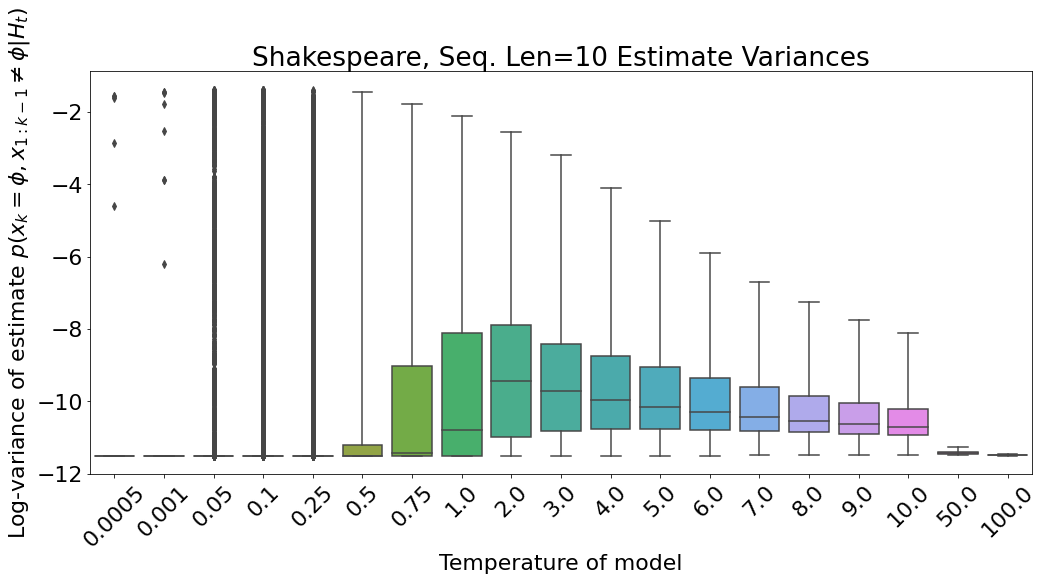

In [9]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=df.variable, y=df.value,whis = 10000.0)
ax.set_xticklabels(temps)
plt.xlabel("Temperature of model")
plt.ylabel(r"Log-variance of estimate $p(x_k = \phi, x_{1:k-1} \neq \phi|H_t)$")
plt.title("Shakespeare, Seq. Len=10, Samp 100 Estimate Variances")
plt.xticks(rotation=45)
plt.tight_layout()

## Sequence Length: 2

In [11]:
df.value += 1e-5
df['value'] = np.log(df.value)
# df['value'] = np.log(df.value + 1e-2)
df.head()
# df.shape

,variable,value
0,0,-11.512925
1,0,-11.512925
2,0,-11.512925
3,0,-11.512925
4,0,-11.512925


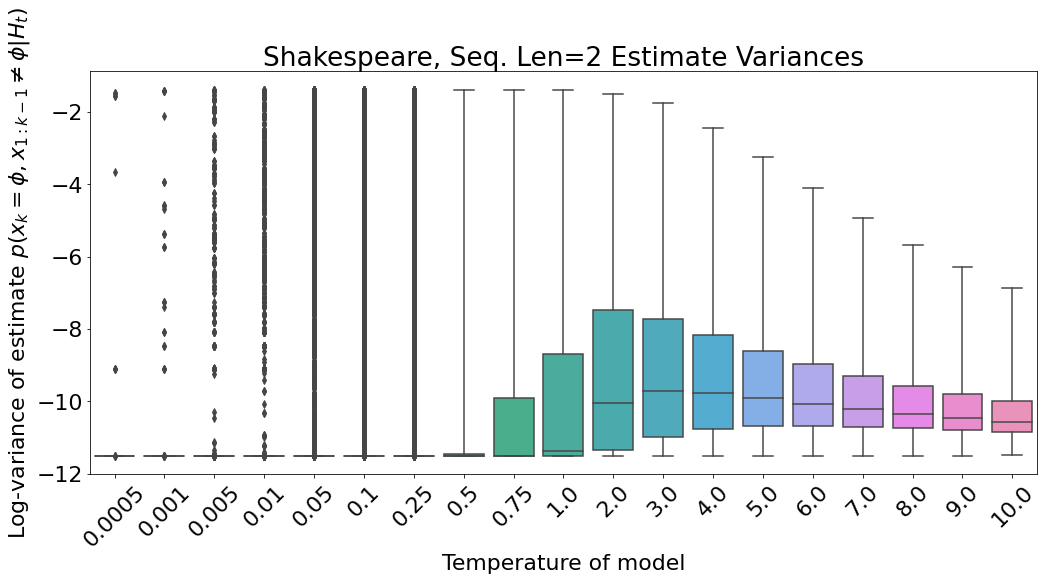

In [20]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=df.variable, y=df.value,whis = 10000.0)
ax.set_xticklabels(temps)
plt.xlabel("Temperature of model")
plt.ylabel(r"Log-variance of estimate $p(x_k = \phi, x_{1:k-1} \neq \phi|H_t)$")
plt.title("Shakespeare, Seq. Len=2, Samp: 1000 Estimate Variances")
plt.xticks(rotation=45)
plt.tight_layout()

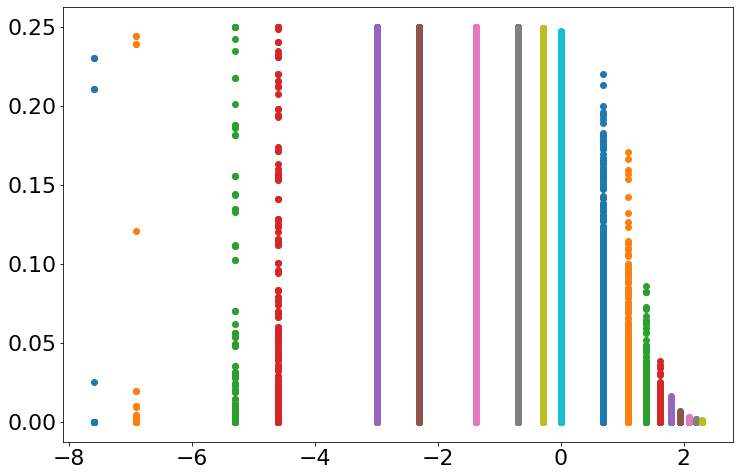

In [14]:
fig = plt.subplots(figsize = (12,8))
for i,temp in enumerate(temps):
    plt.scatter(torch.ones(data_tensor.shape[-1])*np.log(temp),data_tensor[i])
# plt.boxplot(data_tensor)
plt.show()

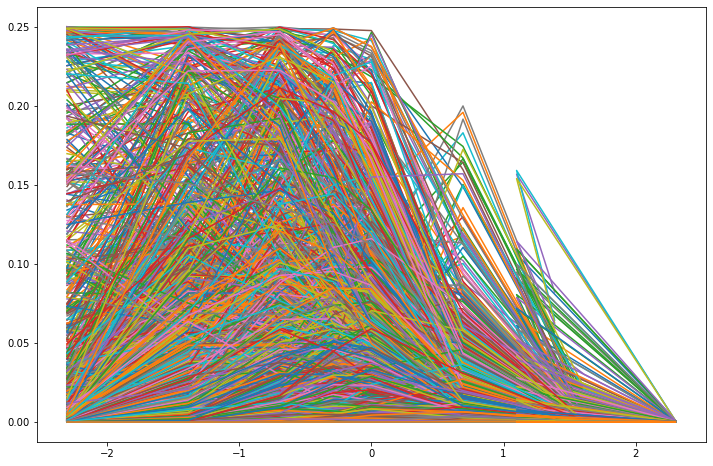

In [11]:
fig = plt.subplots(figsize = (12,8))
log_temps = [np.log(t) for t in temps]
thresh = 50000
for i in range(data_tensor.shape[-1]):
    plt.plot(log_temps, data_tensor[:,i])
    if i > thresh:
        break
# plt.boxplot(data_tensor)
plt.show()